📌 Project Introduction

In this project, we use three different models to classify images of five different venues: decision tree supervised, decision tree semi-supervised and CNN supervised.
This notebook adress only the first model.

📌 Supervised Learning
Supervised learning uses only labeled data to train the model. By leveraging the structure of decision trees, this approach accurately maps input features to their corresponding labels, enhancing predictive performance.

📌 In this Project, we will:

    Analyze customer data provided in data set (EDA= exploratory data analysis) 
    Build two models that can classify images

📌 Install  and importing Libraries

In [73]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dask.diagnostics import ProgressBar
from PIL import Image
import dask.bag as db

In [91]:
import torch
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score

import platform

In [80]:
pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 16.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [106]:
pip install imagehash Pillow

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 15.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 8.1 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
pip  install dask

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.3 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 16.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 5.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 6.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 6.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torch

  Using cached torch-2.2.2-cp311-none-macosx_10_9_x86_64.whl.metadata (25 kB)
Using cached torch-2.2.2-cp311-none-macosx_10_9_x86_64.whl (150.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 17.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 12.4 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip  install torchvision

  Using cached torchvision-0.17.2-cp311-cp311-macosx_10_13_x86_64.whl.metadata (6.6 kB)
Using cached torchvision-0.17.2-cp311-cp311-macosx_10_13_x86_64.whl (1.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 14.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 6.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 5.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.6/296.6 kB 6.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 4.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Decision trees for supervised learning


#### Code for use gpu in Mac

In [92]:
has_gpu = torch.cuda.is_available()
has_mps = torch.backends.mps.is_built()
device = "mps" if has_mps else "cuda" if torch.cuda.is_available() else "cpu"

In [93]:
print(f"Python Platform: {platform.platform()}")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

Python Platform: macOS-10.16-x86_64-i386-64bit
MPS (Apple Metal) is AVAILABLE
Target device is mps


In [95]:
img_path = 'final_dataset'
images = []
labels = []

label_map = {
    'bar': 0,
    'beach': 1,
    'bookstore': 2,
    'restaurant': 3,
    'subway': 4
}

transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

In [99]:
device = torch.device('cpu')

In [100]:
for name, num in label_map.items():
    for img_name in os.listdir(os.path.join(img_path, name)):
        img_file = Image.open(os.path.join(img_path, name, img_name)).convert('RGB')
        img = transforms(img_file).to(device)
        images.append(img.cpu().numpy())
        labels.append(num)
    print(f"finish to read all {name} images")

finish to read all bar images
finish to read all beach images
finish to read all bookstore images
finish to read all restaurant images
finish to read all subway images


📌 Data Splitting into images and labels 

In [ ]:
X = np.array(images)
Y = np.array(labels)

📌 Image Preprocessing:

    Resizing: Given the variability in image dimensions, we choosee to rezise our dataset dimension to 32*32
    Normalization: Normalize pixel values for better model performance.

In [102]:
# Normalize the data
X = X / 255.0

# Reshape
X_reshape = X.reshape(X.shape[0], -1)

📌 Data splitting into train and test

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X_reshape,Y, test_size=0.2, random_state=42)

In [104]:
# Train model
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=35, min_samples_split=20, min_samples_leaf=5)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=35, min_samples_leaf=5,
                       min_samples_split=20)

Accuracy: 0.5152027027027027; Precision: 0.49191256552292983; Recall: 0.5031543345299828; F1: 0.49443541490754495


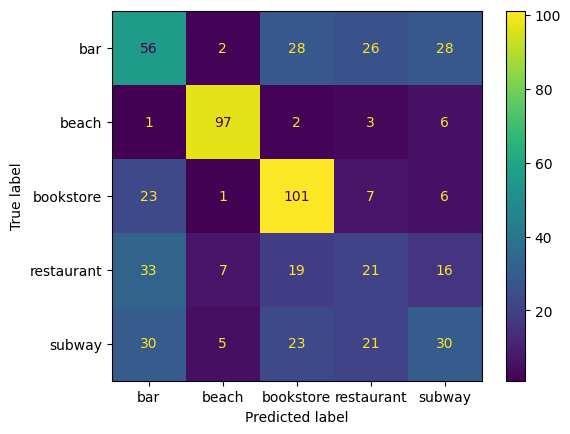

In [105]:
# Evaluation
Y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Accuracy: {accuracy}; Precision: {precision}; Recall: {recall}; F1: {f1}")
confusion_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=label_map.keys())
confusion_matrix_display.plot()
plt.show()